## Análisis de datos - Clase 3

### Taller práctico - análisis completo de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

1. Importamos los datasets

In [8]:
# Dataset de carreras del 2024
carreras_24 = pd.read_csv('../datasets/f1_2024_R.csv')

# Dataset de qualifications del 2024
qualis_24 = pd.read_csv('../datasets/f1_2024_Q.csv')

# Dataset de sprints del 2024
sprints_24 = pd.read_csv('../datasets/f1_2024_S.csv')

In [9]:
carreras_24.shape, qualis_24.shape, sprints_24.shape

((26606, 34), (7590, 34), (2418, 34))

In [10]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                26606 non-null  object 
 1   Driver              26606 non-null  object 
 2   DriverNumber        26606 non-null  int64  
 3   LapTime             26381 non-null  float64
 4   LapNumber           26606 non-null  float64
 5   Stint               26606 non-null  float64
 6   PitOutTime          840 non-null    object 
 7   PitInTime           849 non-null    object 
 8   Sector1Time         26066 non-null  float64
 9   Sector2Time         26574 non-null  float64
 10  Sector3Time         26553 non-null  float64
 11  Sector1SessionTime  26008 non-null  object 
 12  Sector2SessionTime  26574 non-null  object 
 13  Sector3SessionTime  26553 non-null  object 
 14  SpeedI1             22460 non-null  float64
 15  SpeedI2             26552 non-null  float64
 16  Spee

In [11]:
qualis_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7590 entries, 0 to 7589
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                7590 non-null   object 
 1   Driver              7590 non-null   object 
 2   DriverNumber        7590 non-null   int64  
 3   LapTime             5101 non-null   float64
 4   LapNumber           7590 non-null   float64
 5   Stint               7590 non-null   float64
 6   PitOutTime          2249 non-null   object 
 7   PitInTime           2240 non-null   object 
 8   Sector1Time         5677 non-null   float64
 9   Sector2Time         7481 non-null   float64
 10  Sector3Time         7071 non-null   float64
 11  Sector1SessionTime  5677 non-null   object 
 12  Sector2SessionTime  7481 non-null   object 
 13  Sector3SessionTime  7071 non-null   object 
 14  SpeedI1             7512 non-null   float64
 15  SpeedI2             7479 non-null   float64
 16  SpeedF

In [12]:
sprints_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                2418 non-null   object 
 1   Driver              2418 non-null   object 
 2   DriverNumber        2418 non-null   int64  
 3   LapTime             2274 non-null   float64
 4   LapNumber           2418 non-null   float64
 5   Stint               2406 non-null   float64
 6   PitOutTime          48 non-null     object 
 7   PitInTime           42 non-null     object 
 8   Sector1Time         2297 non-null   float64
 9   Sector2Time         2416 non-null   float64
 10  Sector3Time         2416 non-null   float64
 11  Sector1SessionTime  2293 non-null   object 
 12  Sector2SessionTime  2416 non-null   object 
 13  Sector3SessionTime  2416 non-null   object 
 14  SpeedI1             2136 non-null   float64
 15  SpeedI2             2416 non-null   float64
 16  SpeedF

In [88]:
carreras_24.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'EventName', 'SessionType',
       'EventDate'],
      dtype='object')

In [19]:
carreras_24.head(10)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,EventName,SessionType,EventDate
0,0 days 01:01:37.489000,VER,1,97.284,1.0,1.0,NaN,NaN,NaN,41.266,...,2024-03-02 15:03:42.342,12,1.0,False,NaN,False,False,Bahrain Grand Prix,R,2024-03-02
1,0 days 01:03:13.785000,VER,1,96.296,2.0,1.0,NaN,NaN,30.916,41.661,...,2024-03-02 15:05:19.920,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
2,0 days 01:04:50.538000,VER,1,96.753,3.0,1.0,NaN,NaN,30.999,41.966,...,2024-03-02 15:06:56.216,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
3,0 days 01:06:27.185000,VER,1,96.647,4.0,1.0,NaN,NaN,30.931,41.892,...,2024-03-02 15:08:32.969,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
4,0 days 01:08:04.358000,VER,1,97.173,5.0,1.0,NaN,NaN,31.255,42.056,...,2024-03-02 15:10:09.616,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
5,0 days 01:09:41.450000,VER,1,97.092,6.0,1.0,NaN,NaN,31.041,42.187,...,2024-03-02 15:11:46.789,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
6,0 days 01:11:18.488000,VER,1,97.038,7.0,1.0,NaN,NaN,31.015,42.118,...,2024-03-02 15:13:23.881,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
7,0 days 01:12:55.512000,VER,1,97.024,8.0,1.0,NaN,NaN,31.041,42.077,...,2024-03-02 15:15:00.919,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
8,0 days 01:14:32.741000,VER,1,97.229,9.0,1.0,NaN,NaN,31.100,42.166,...,2024-03-02 15:16:37.943,1,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02
9,0 days 01:16:09.701000,VER,1,96.960,10.0,1.0,NaN,NaN,30.986,42.009,...,2024-03-02 15:18:15.172,12,1.0,False,NaN,False,True,Bahrain Grand Prix,R,2024-03-02


In [14]:
carreras_24.describe()

,DriverNumber,LapTime,LapNumber,Stint,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,TrackStatus,Position
count,26606.000000,26381.000000,26606.000000,26606.000000,26066.000000,26574.000000,26553.000000,22460.000000,26552.000000,25728.000000,24422.000000,26606.000000,26606.000000,26578.000000
mean,28.991393,92.727333,30.507931,1.992934,28.544514,35.105664,27.942290,254.994167,247.649292,268.093711,296.643928,14.980305,7.034090,9.793325
std,23.849732,60.498621,18.260169,0.872187,6.928019,7.506386,7.434872,45.269851,43.887292,34.744874,31.732479,11.266617,66.696792,5.430816
min,1.000000,67.694000,1.000000,1.000000,16.897000,17.488000,17.690000,59.000000,57.000000,1.000000,64.000000,1.000000,1.000000,1.000000
25%,11.000000,81.964000,15.000000,1.000000,25.398250,29.584000,23.076000,214.000000,211.000000,248.000000,289.000000,6.000000,1.000000,5.000000
50%,22.000000,89.076000,30.000000,2.000000,28.470000,32.958000,25.949000,273.000000,257.000000,275.000000,302.000000,13.000000,1.000000,10.000000
75%,44.000000,98.704000,45.000000,3.000000,31.086000,41.288000,31.986000,289.000000,280.000000,291.000000,313.000000,21.000000,1.000000,14.000000
max,81.000000,2526.253000,78.000000,5.000000,97.585000,90.308000,97.241000,357.000000,343.000000,357.000000,362.000000,78.000000,2671.000000,20.000000


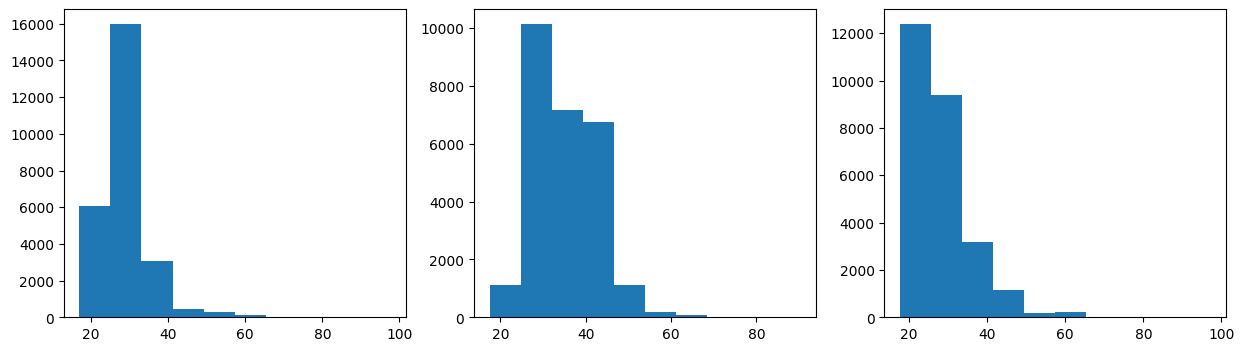

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

ax[0].hist(carreras_24['Sector1Time'])
ax[1].hist(carreras_24['Sector2Time'])
ax[2].hist(carreras_24['Sector3Time'])

plt.show()

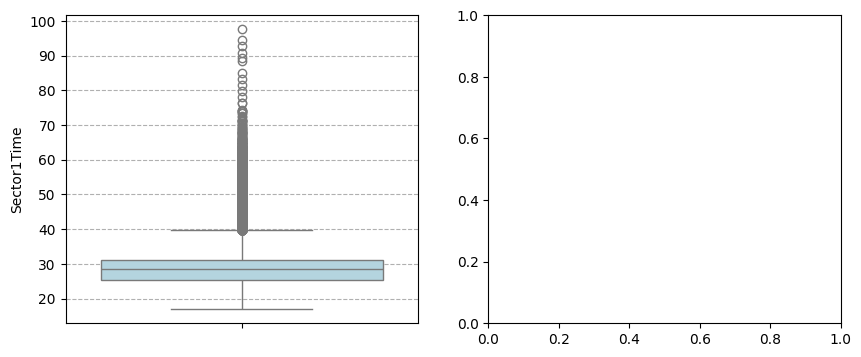

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=carreras_24, y='Sector1Time', color="lightblue", ax=ax[0])

ax[0].grid(axis='y', ls='--')

plt.show()

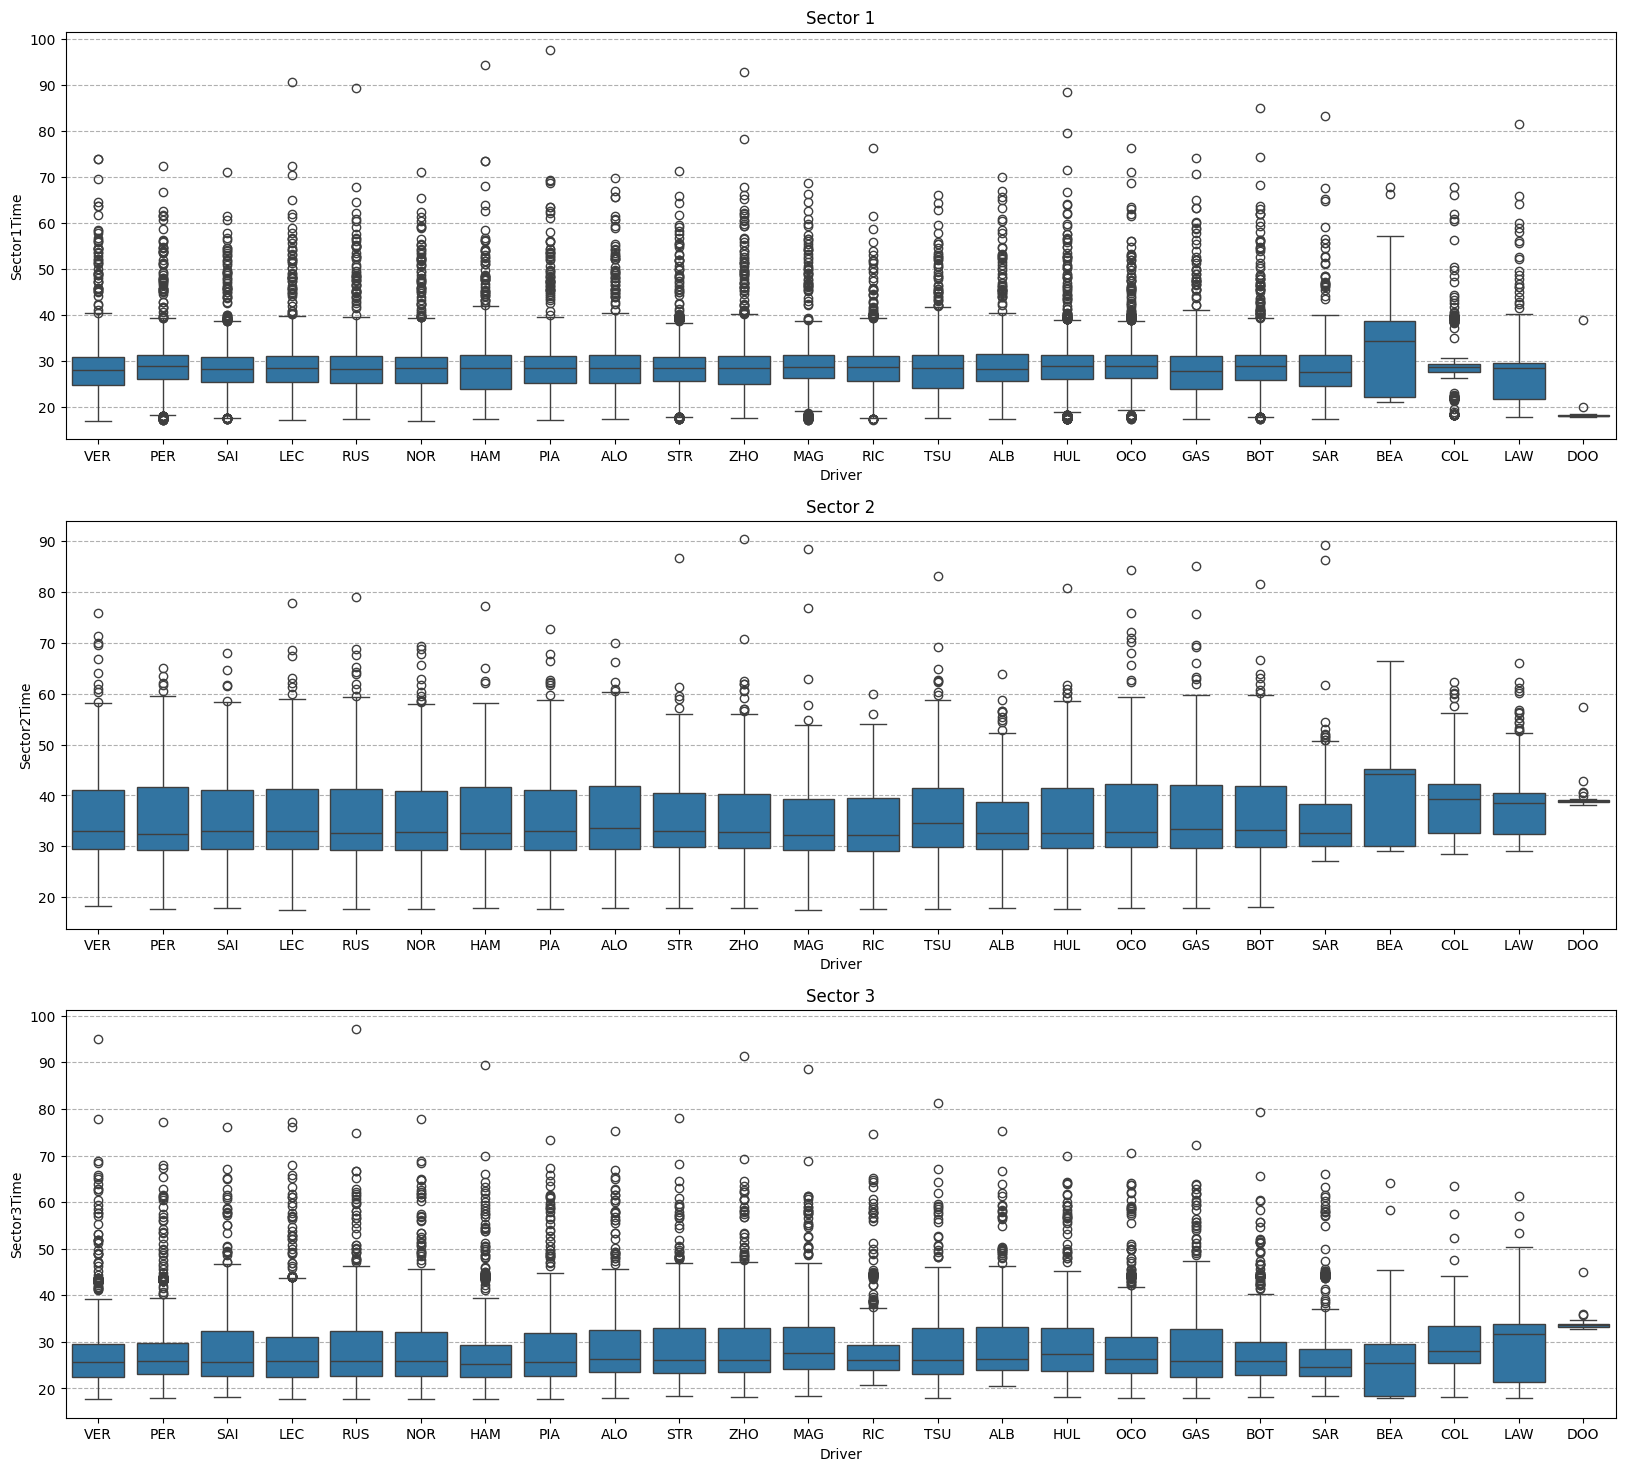

In [87]:
fig, ax = plt.subplots(3, 1,figsize=(20, 18))

sns.boxplot(data=carreras_24, y='Sector1Time', x='Driver', ax=ax[0])
sns.boxplot(data=carreras_24, y='Sector2Time', x='Driver', ax=ax[1])
sns.boxplot(data=carreras_24, y='Sector3Time', x='Driver', ax=ax[2])

for i in (0,1,2):
    ax[i].grid(axis='y', ls='--')
    ax[i].set_title(f'Sector {i+1}')

plt.show()

In [85]:
def scatter(driver):
    df = carreras_24[carreras_24['Driver']==driver]

    plt.figure(figsize=(10, 5))
    plt.scatter(df['LapStartDate'], df['Sector1Time'], label='Sector 1', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector2Time'], label='Sector 2', alpha=0.7)
    plt.scatter(df['LapStartDate'], df['Sector3Time'], label='Sector 3', alpha=0.7)

    plt.xlabel('')
    plt.ylabel('Time')
    plt.title(f'Sector Times - Driver {driver}')
    plt.legend()
    plt.xticks(ticks=plt.xticks()[0], labels=[''] * len(plt.xticks()[0]))
    plt.show()

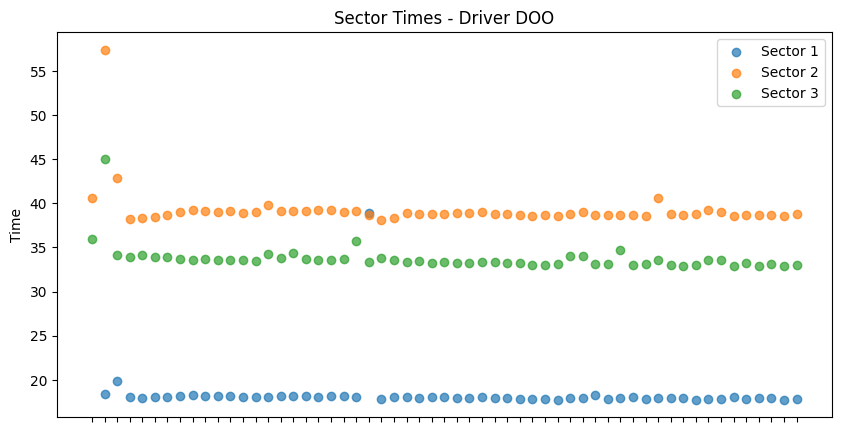

In [86]:
scatter('DOO')

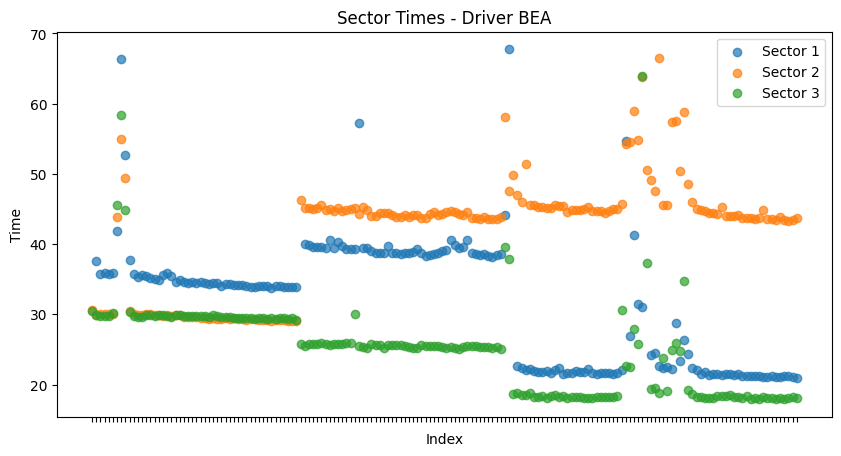

In [84]:
scatter('BEA')

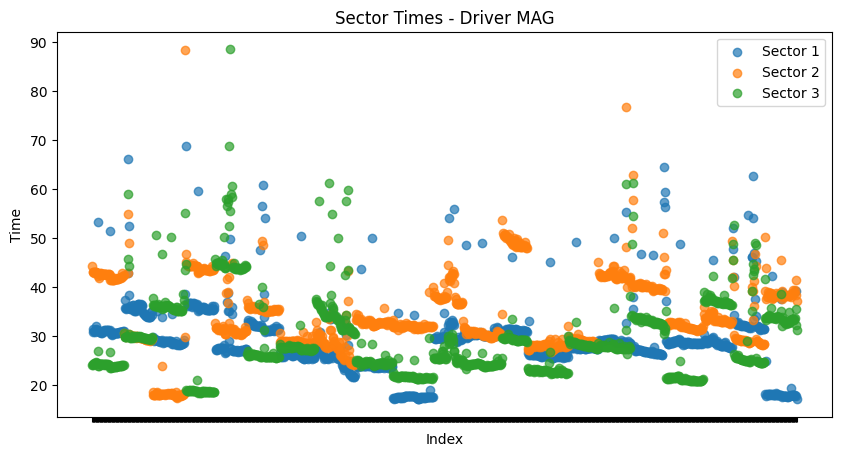

In [82]:
scatter('MAG')